<h1 style="text-align: center;"> BCSE417P Lab Assignment 2</h1>

#### Student Information

**Name:** Swarab Raul  
**Registration Number:** 21BAI1225  
**Date:** Setptember 14, 2024

#### GitHub Repository

- [Swarab Raul's GitHub Repository](https://github.com/SwarabRaul/MVAssignment/blob/main/Assignment%202/21BAI1225_GeometricRectification.ipynb)

---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distort_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(src_points), np.float32(dst_points))
    rows, cols, _ = image.shape
    distorted_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return distorted_image

In [3]:
def rectify_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(dst_points), np.float32(src_points))
    rows, cols, _ = image.shape
    rectified_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return rectified_image

In [4]:
def display_images(original, distorted, rectified, task_name):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original {task_name}')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(distorted, cv2.COLOR_BGR2RGB))
    plt.title(f'Distorted {task_name}')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(rectified, cv2.COLOR_BGR2RGB))
    plt.title(f'Rectified {task_name}')
    plt.show()

In [17]:
points = []

def get_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        print(f"Point selected: {x}, {y}")

# Load the original image
image = cv2.imread('India_Gate.jpg')

cv2.namedWindow("Select points")
cv2.setMouseCallback("Select points", get_points)

while True:
    cv2.imshow("Select points", image)
    if cv2.waitKey(1) & 0xFF == 27 or len(points) == 3:
        break

cv2.destroyAllWindows()

print("Selected points:", points)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread (0x2fc83b0).
Cannot move to target thread (0x21e0bc0)

QObject::moveToThread: Current thread (0x21e0bc0) is not the object's thread

Point selected: 59, 494
Point selected: 111, 75
Point selected: 690, 441
Selected points: [(59, 494), (111, 75), (690, 441)]


### Lab Task 1: Geometric Rectification of Satellite Imagery

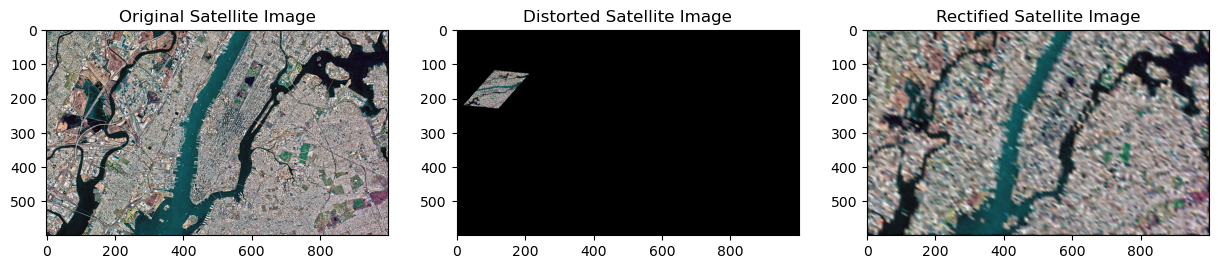

In [9]:
image = cv2.imread('NewYork-from-Satellite.jpg')

src_points = np.array([(4, 6), (6, 595), (990, 593)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_satellite = distort_image(image, src_points, dst_points_distort)
rectified_satellite = rectify_image(distorted_satellite, src_points, dst_points_distort)

display_images(image, distorted_satellite, rectified_satellite, 'Satellite Image')

**Objective:**  
The goal is to correct the geometric distortions in satellite images using ground control points (GCPs) and image processing techniques such as affine transformation and bilinear interpolation.

**Method:**
1. **Load the Image:** Import the distorted satellite image into Python using OpenCV.
2. **Identify Ground Control Points (GCPs):** Mark identifiable points on the distorted image, such as known landmarks or corners of buildings, roads, or other recognizable objects.
3. **Define the Corresponding Coordinates:** Define the correct positions of these control points in the rectified image. These should be based on geographic coordinates or known positions.
4. **Apply Transformation:** Use affine transformation to map the distorted image to the correct coordinates. This involves calculating a transformation matrix between the control points of the distorted and the rectified image.
5. **Interpolation:** Bilinear interpolation is used to resample pixel values to produce a smooth, corrected image.
6. **Comparison:** Compare the original distorted image with the rectified one to evaluate how well the distortion has been corrected.

**Challenges:**
- Selecting accurate GCPs in both the distorted and rectified images can be difficult, especially if landmarks are unclear.
- Ensuring that the interpolation method produces a visually accurate result, particularly in areas with a lot of detail.

---

### Lab Task 2: Medical Image Rectification (MRI)

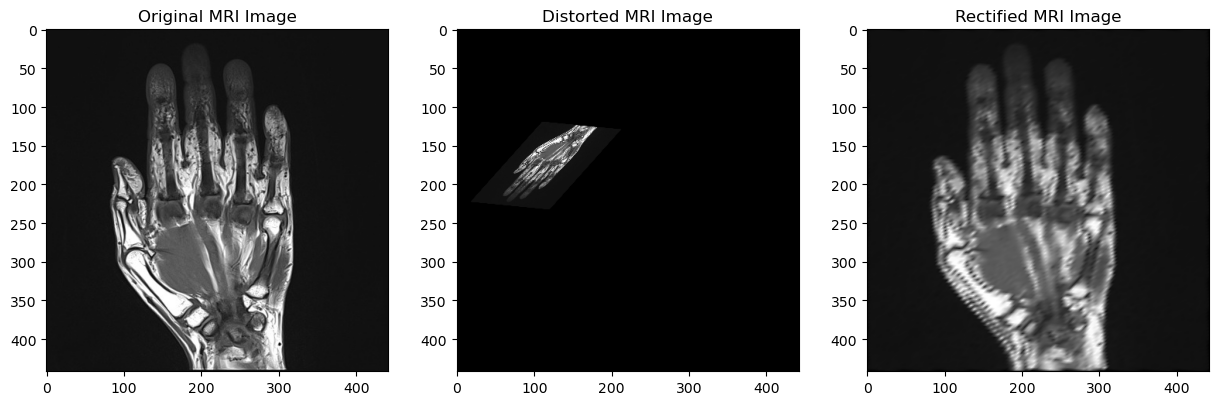

In [12]:
image = cv2.imread('MRI_Hand.jpeg')

src_points = np.array([(4, 438), (437, 437), (435, 11)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_mri = distort_image(image, src_points, dst_points_distort)
rectified_mri = rectify_image(distorted_mri, src_points, dst_points_distort)

display_images(image, distorted_mri, rectified_mri, 'MRI Image')

**Objective:**  
Rectify distortions in MRI images by aligning them with reference anatomical models, correcting for patient motion or image acquisition distortions.

**Method:**
1. **Load the MRI Image:** Import the distorted MRI image using OpenCV.
2. **Mark Key Points:** Identify anatomical landmarks in the MRI image, such as specific bones, organs, or other distinguishable features.
3. **Reference Model:** Obtain corresponding coordinates from an anatomical reference model, which represents the ideal (non-distorted) positions of these key points.
4. **Transformation:** Apply affine transformation to align the distorted MRI image with the reference model. The transformation matrix is calculated based on the landmarks.
5. **Interpolation:** Bilinear interpolation is applied to resample the pixel values in the rectified MRI image.
6. **Assessment:** Compare the rectified MRI image with the reference model to assess the accuracy of the rectification.

**Challenges:**
- Precisely identifying key anatomical points can be difficult, especially if the MRI is heavily distorted or the structures are ambiguous.
- Differences in individual anatomy may lead to imperfect alignment with the reference model.

---

### Lab Task 3: Drone Image Rectification

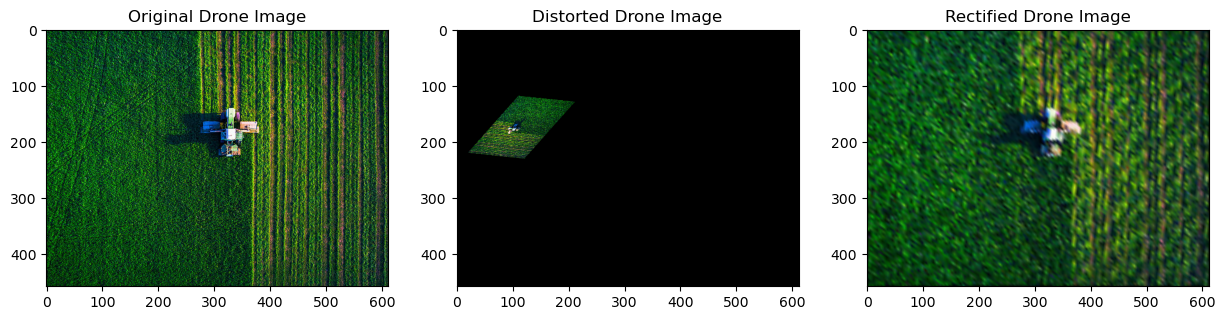

In [14]:
image = cv2.imread('Drone_Farmland.jpg')

src_points = np.array([(6, 7), (4, 458), (606, 454)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_drone = distort_image(image, src_points, dst_points_distort)
rectified_drone = rectify_image(distorted_drone, src_points, dst_points_distort)

display_images(image, distorted_drone, rectified_drone, 'Drone Image')

**Objective:**  
Correct the geometric distortions in drone-captured images of agricultural fields, particularly those caused by the perspective or camera angles.

**Method:**
1. **Import the Image:** Load the distorted drone image into OpenCV.
2. **Identify Control Points:** Select known locations in the field, such as edges of plots or landmarks visible in the image.
3. **Define Corresponding Coordinates:** Specify the correct coordinates for these points in the rectified image, ensuring that the image aligns with the true dimensions of the field.
4. **Apply Transformation:** Calculate and apply an affine transformation to the image based on these points, mapping the distorted image to the rectified coordinates.
5. **Interpolation:** Use bilinear interpolation to fill in pixel values, ensuring a smooth transition between points.
6. **Generate an Orthophoto:** Produce an orthophoto, a geometrically corrected image where distances are uniform.
7. **Comparison:** Compare the original drone image with the rectified orthophoto to assess the correction.

**Challenges:**
- Distortions caused by the drone’s perspective (i.e., the angle of the camera relative to the ground) can be severe, making it hard to select accurate control points.
- Variations in the terrain may also affect the accuracy of the correction.

---

### Lab Task 4: Historical Photo Restoration

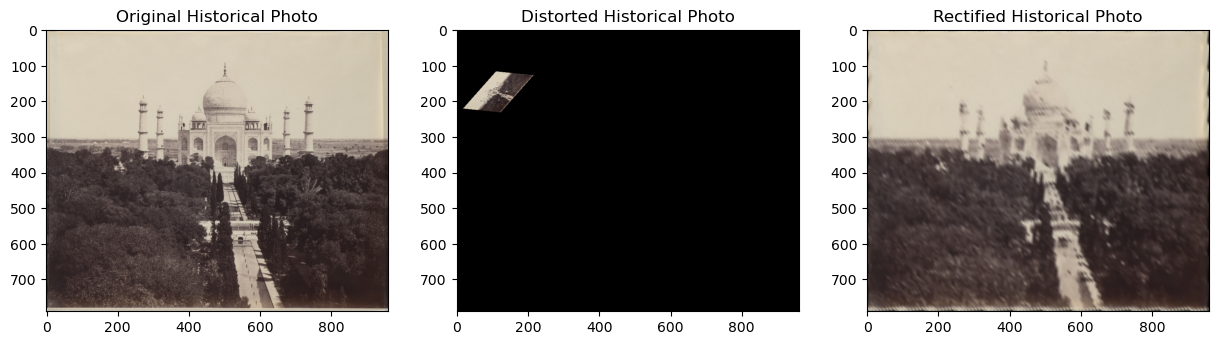

In [16]:
image = cv2.imread('Historical_TajMahal.jpg')

src_points = np.array([(14, 17), (13, 768), (935, 760)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_photo = distort_image(image, src_points, dst_points_distort)
rectified_photo = rectify_image(distorted_photo, src_points, dst_points_distort)

display_images(image, distorted_photo, rectified_photo, 'Historical Photo')

**Objective:**  
Rectify and restore old distorted photographs, removing perspective distortions and restoring the original image quality where possible.

**Method:**
1. **Load the Image:** Import the scanned old photograph into the software.
2. **Identify Key Points:** Identify features on the photograph such as corners of objects, known dimensions, or any identifiable shapes.
3. **Reference or Known Dimensions:** Use a reference image or known dimensions (e.g., the size of a building in the photograph) to define the correct coordinates for the points.
4. **Transformation:** Apply an affine transformation to align the distorted photograph with the reference dimensions.
5. **Interpolation:** Use bilinear interpolation to resample and correct the pixel values.
6. **Comparison:** Compare the original scanned image with the rectified one to assess the effectiveness of the restoration.

**Challenges:**
- Degraded image quality can make it hard to identify key points for transformation.
- Restoring the image without further losing detail or introducing artifacts during interpolation.

---

### Lab Task 5: Architectural Image Rectification

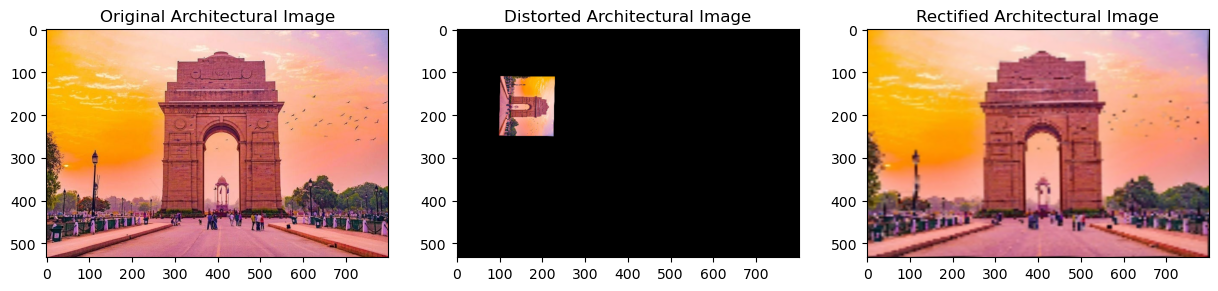

In [18]:
image = cv2.imread('India_Gate.jpg')

src_points = np.array([(59, 494), (111, 75), (690, 441)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_architectural = distort_image(image, src_points, dst_points_distort)
rectified_architectural = rectify_image(distorted_architectural, src_points, dst_points_distort)

display_images(image, distorted_architectural, rectified_architectural, 'Architectural Image')

**Objective:**  
Rectify perspective distortions in architectural images, ensuring the building is represented correctly without distortions caused by camera angles.

**Method:**
1. **Import the Image:** Load the distorted architectural image into OpenCV.
2. **Identify Key Points:** Select identifiable features of the building, such as corners, windows, or edges that should be straight in the rectified image.
3. **Known Dimensions:** Use known dimensions of the building (e.g., the height of a door or window) to determine the correct positions of these points in the rectified image.
4. **Transformation:** Calculate an affine transformation to align the image with these dimensions.
5. **Interpolation:** Use bilinear interpolation to smooth out the pixel values and ensure a clean rectified image.
6. **Comparison:** Compare the original distorted image with the rectified one to evaluate the correction.

**Challenges:**
- Ensuring that all the key points are properly aligned, particularly when the distortion is severe.
- Maintaining the quality and clarity of architectural details in the rectified image.

---

### General Conclusion:

In all the tasks, the critical steps involve selecting accurate control points, calculating an affine transformation, and using bilinear interpolation to smooth out the resampling. Each task has its unique challenges based on the type of image (e.g., satellite, medical, drone, historical, or architectural), but the underlying methodology remains consistent. By carefully identifying key points and applying the appropriate transformations, geometric distortions can be effectively corrected.